## RE3: Did the books with more text reviews receive higher ratings?

####  initially checking any correlation exists between attributes of both genres and then considered the textreviews count and         average ratings to know the behavior of the ratings.

### importing required libraries

In [1]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np; np.random.seed(24191)
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates
import matplotlib.pyplot as plt
%matplotlib inline


### Loading the dataset of Mystery, Thriller and Crime

In [2]:
df = pd.read_json("books_metadata_thriller.json")
df

,text_reviews_count,language_code,popular_shelves,is_ebook,average_rating,description,authors,publication_year,book_id,ratings_count,work_id,title
1,3,eng,"[{'count': '1694', 'name': 'mystery'}, {'count...",false,3.96,Agatha Christie's most ingenious murder myster...,"[{'author_id': '123715', 'role': ''}, {'author...",2013,16158998,5,2288775,A Murder is Announced
2,6,eng,"[{'count': '171', 'name': 'to-read'}, {'count'...",false,4.14,"""Poetic, down trodden and nihilistic, Jonathan...","[{'author_id': '4577517', 'role': ''}]",2014,22722787,18,42251489,The Cost of Doing Business
3,2,eng,"[{'count': '1642', 'name': 'mystery'}, {'count...",false,3.93,In Agatha Christie's classic mystery 4:50 From...,"[{'author_id': '123715', 'role': ''}, {'author...",2013,16158996,5,6490729,4:50 From Paddington
4,46,eng,"[{'count': '328', 'name': 'mystery'}, {'count'...",false,4.07,Past and present collide as Special Agent Pend...,"[{'author_id': '12577', 'role': ''}, {'author_...",2013,17368265,250,24152432,"White Fire (Pendergast, #13)"
5,4,eng,"[{'count': '5396', 'name': 'to-read'}, {'count...",false,4.11,1 MP3-CD / 10 hours\nHaunted by a series of ho...,"[{'author_id': '25108', 'role': ''}, {'author_...",2004,926660,15,911663,Monkeewrench
...,...,...,...,...,...,...,...,...,...,...,...,...
103402,20,eng,"[{'count': '103', 'name': 'to-read'}, {'count'...",false,3.91,Quintin Jardine's new Bob Skinner novel sees t...,"[{'author_id': '31642', 'role': ''}]",2014,21801085,134,41057313,"Hour of Darkness (Bob Skinner, #24)"
103403,4,eng,"[{'count': '604', 'name': 'to-read'}, {'count'...",true,4.24,"In the city that never sleeps, spirits are equ...","[{'author_id': '7741497', 'role': ''}, {'autho...",2014,23363286,15,42919549,Dead Endings
103405,3,eng,"[{'count': '735', 'name': 'to-read'}, {'count'...",false,4.11,"Accompanied by Holmes and Watson, Mrs. Hudson ...","[{'author_id': '5401342', 'role': ''}]",2015,25727303,6,45563843,Mrs. Hudson in New York
103406,7,eng,"[{'count': '36', 'name': 'to-read'}, {'count':...",true,4.00,"When Kirk Stanford moves into his new home, st...","[{'author_id': '4590885', 'role': ''}]",2014,23252156,16,42794368,Wicked Reflection


### visualizing and analysing the pair plot of the dataset between all attributes

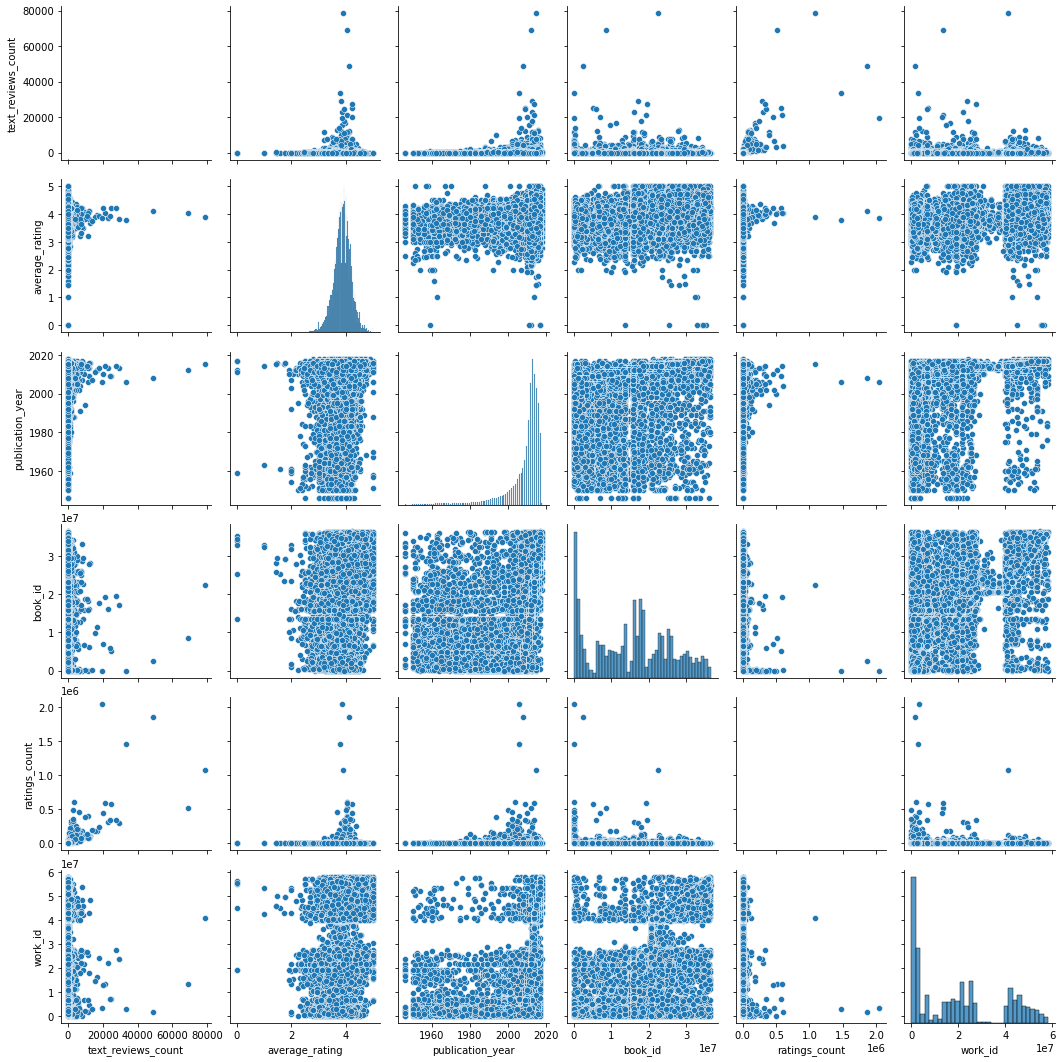

In [3]:
sns.pairplot(df)
plt.show()

### Checking for correlation between the attributes of whole dataset

#### After analysing the results of correlation we have considered the text reviews counts and average ratings for better understanding of  behavior of the ratings with respective increasing order of text reviews count.

In [4]:
corr = df.corr()
corr

,text_reviews_count,average_rating,publication_year,book_id,ratings_count,work_id
text_reviews_count,1.000000,0.005626,0.015728,-0.031417,0.732680,-0.006789
average_rating,0.005626,1.000000,0.111637,0.147614,0.013630,0.169466
publication_year,0.015728,0.111637,1.000000,0.546695,-0.011952,0.549748
book_id,-0.031417,0.147614,0.546695,1.000000,-0.054379,0.821168
ratings_count,0.732680,0.013630,-0.011952,-0.054379,1.000000,-0.033992
work_id,-0.006789,0.169466,0.549748,0.821168,-0.033992,1.000000


### Here  excluding or removing the duplicate correlations between attributes of an dataset

<Figure size 360x360 with 0 Axes>

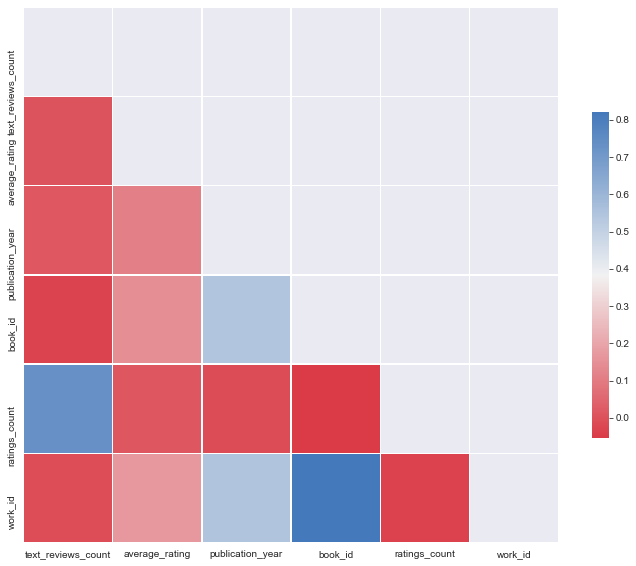

In [5]:
plt.figure(figsize=(5,5))

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'dark')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

sns.heatmap(corr, mask = mask, cmap=cmap, square=True, linewidths=0.5, cbar_kws={"shrink": .5}, ax=ax)

plt.show()

### Displaying the Top 20 rated books of Mystery, Crime and Thriller

In [6]:
most_rated_titles = df[['title', 'ratings_count', 'text_reviews_count','average_rating','publication_year']].sort_values('ratings_count', ascending = False).reset_index()
most_rated_titles = most_rated_titles.drop(['index'], axis=1)
most_rated_titles = most_rated_titles.head(20)
most_rated_titles

,title,ratings_count,text_reviews_count,average_rating,publication_year
0,"Angels & Demons (Robert Langdon, #1)",2046499,19683,3.86,2006
1,"The Girl with the Dragon Tattoo (Millennium, #1)",1858152,48632,4.11,2008
2,"The Da Vinci Code (Robert Langdon, #2)",1465770,33535,3.79,2006
3,The Girl on the Train,1076144,78438,3.88,2015
4,A Time to Kill,604739,3691,4.03,2004
5,Gone Girl,588451,21082,4.03,2014
6,"The Girl Who Played with Fire (Millennium, #2)",575163,24868,4.22,2009
7,Gone Girl,513361,69096,4.03,2012
8,"The Firm (Penguin Readers, Level 5)",494812,3173,3.99,2000
9,Deception Point,464544,6394,3.67,2002


### Visualizing the plot between text reviews count and the Average ratings using joint plot

#### From the resulted plot we can say that, as the number of text review count increasing respectively the average ratings also gradually increasing from around just above 3.8 ratings to almost 4.0 rating

C:\Users\upend\anaconda3\lib\site-packages\seaborn\axisgrid.py:1629: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


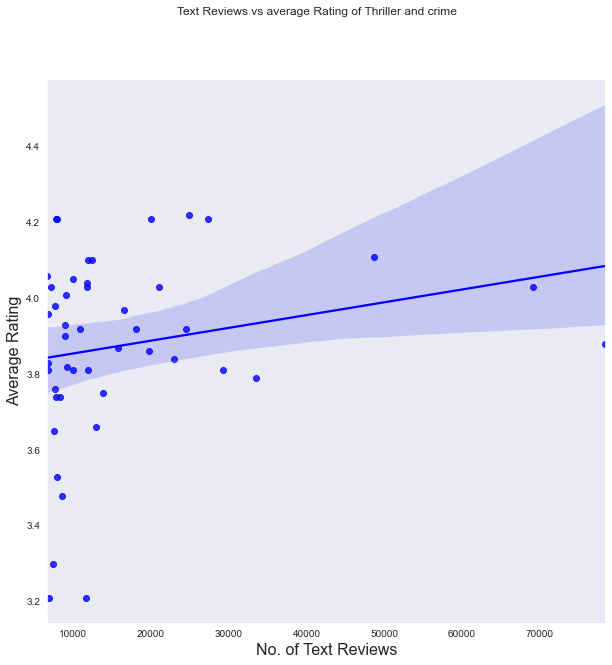

In [7]:
data_TextReviews = df[df['text_reviews_count'] > 6500]

ax = sns.jointplot(x="text_reviews_count", y="average_rating", data = data_TextReviews, height=10, ratio = 15000, kind = 'reg', color = 'blue')
ax.fig.suptitle("Text Reviews vs average Rating of Thriller and crime")
ax.set_axis_labels("No. of Text Reviews", "Average Rating", fontsize=16)
plt.show()

### Visualising the Top20 rated books of Genre using joint plot

#### From the plot we can notice that, the output line almost remains constant at around just above the 4.0 rating between text reviews count and average ratings.

C:\Users\upend\anaconda3\lib\site-packages\seaborn\axisgrid.py:1629: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


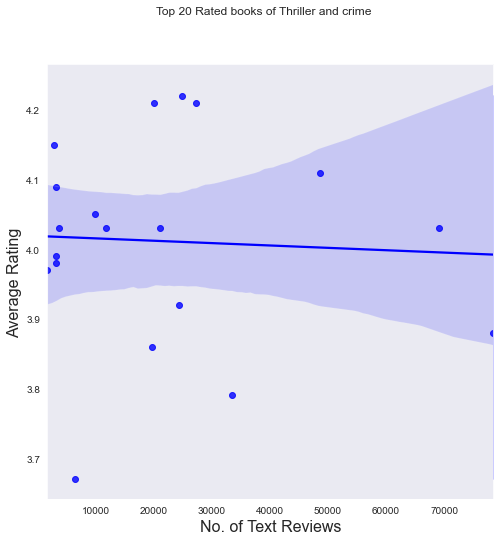

In [8]:
data_TextReviews = df[df['ratings_count'] > 308551]
ax = sns.jointplot(x="text_reviews_count", y="average_rating", data = data_TextReviews,height=8,ratio=1200, kind = 'reg', color = 'blue')
ax.fig.suptitle("Top 20 Rated books of Thriller and crime")
ax.set_axis_labels("No. of Text Reviews", "Average Rating", fontsize=16)
plt.show()

### Loading the comics and graphics dataset

In [10]:
df = pd.read_json("books_metadata_final.json")
df

,text_reviews_count,language_code,popular_shelves,is_ebook,average_rating,description,authors,publication_year,book_id,ratings_count,work_id,title
2,5,eng,"[{'count': '493', 'name': 'to-read'}, {'count'...",false,4.28,The questions plaguing Captain America's dream...,"[{'author_id': '37450', 'role': ''}]",2012,13571772,51,102217,Captain America: Winter Soldier (The Ultimate ...
4,6,en-US,"[{'count': '20', 'name': 'to-read'}, {'count':...",false,4.06,These are the stories that catapulted Superman...,"[{'author_id': '81563', 'role': ''}, {'author_...",1997,707611,51,693886,"Superman Archives, Vol. 2"
6,9,eng,"[{'count': '47', 'name': 'to-read'}, {'count':...",false,4.15,PRODUCT DESCRIPTION: The first new volume of G...,"[{'author_id': '14965', 'role': ''}, {'author_...",2016,27036536,39,47077783,"War Stories, Volume 3"
11,26,eng,"[{'count': '104', 'name': 'to-read'}, {'count'...",false,3.16,Sir Arthur Conan Doyle's dauntless detective r...,"[{'author_id': '61231', 'role': ''}, {'author_...",2011,11827783,114,16782451,Sherlock Holmes: Year One
12,6,eng,"[{'count': '133', 'name': 'manga'}, {'count': ...",false,4.41,This is the story of a group of boys who try t...,"[{'author_id': '294649', 'role': ''}]",2012,12349665,149,3062163,"Naoki Urasawa's 20th Century Boys, Volume 20 (..."
...,...,...,...,...,...,...,...,...,...,...,...,...
89401,4,eng,"[{'count': '54', 'name': 'manga'}, {'count': '...",false,4.09,"Student by day, demon hunter by night! R to L ...","[{'author_id': '8342728', 'role': ''}]",2009,6419558,172,6608706,"Kekkaishi, Vol. 19 (Kekkaishi, #19)"
89402,3,eng,"[{'count': '9', 'name': 'to-read'}, {'count': ...",false,4.73,"""A FULL CONFESSION""\nSolve one murder, uncover...","[{'author_id': '356424', 'role': ''}]",2016,32598998,3,53177155,The Black Monday Murders #3
89404,53,eng,"[{'count': '625', 'name': 'to-read'}, {'count'...",false,3.74,The vampire epic by best-selling author George...,"[{'author_id': '13557729', 'role': 'Adaptor'},...",2011,10644600,853,18566693,Fevre Dream
89409,2,eng,"[{'count': '1', 'name': '3-2017-ha-pages-read-...",true,3.00,Prepare yourself for Dejah Thoris as you've ne...,"[{'author_id': '5740317', 'role': 'Writer'}, {...",2016,28928706,10,49145631,Dejah Thoris #1


### visualizing and analysing the pair plot of the dataset between all attributes

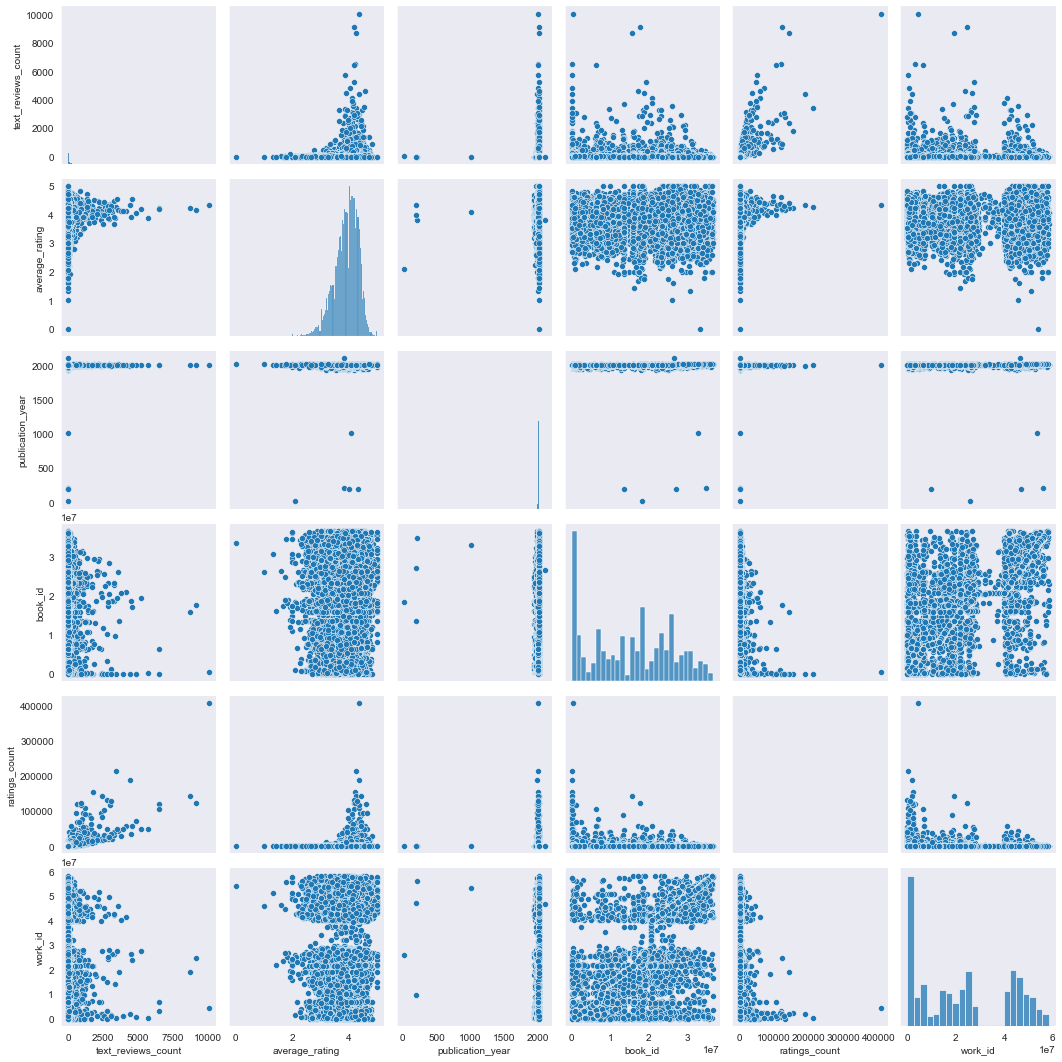

In [11]:
sns.pairplot(df)
plt.show()

### Checking for correlation between the attributes of whole dataset

#### After analysing the results of correlation we have considered the text reviews counts and average ratings for better understanding of  behavior of the ratings with respective increasing order of text reviews count.

In [12]:
corr = df.corr()
corr

,text_reviews_count,average_rating,publication_year,book_id,ratings_count,work_id
text_reviews_count,1.000000,0.066989,0.001344,-0.055256,0.759329,-0.038904
average_rating,0.066989,1.000000,0.002312,-0.066735,0.101873,-0.081516
publication_year,0.001344,0.002312,1.000000,0.149130,-0.019454,0.138031
book_id,-0.055256,-0.066735,0.149130,1.000000,-0.132525,0.904295
ratings_count,0.759329,0.101873,-0.019454,-0.132525,1.000000,-0.110294
work_id,-0.038904,-0.081516,0.138031,0.904295,-0.110294,1.000000


### Here  excluding or removing the duplicate correlations between attributes of an dataset

<Figure size 360x360 with 0 Axes>

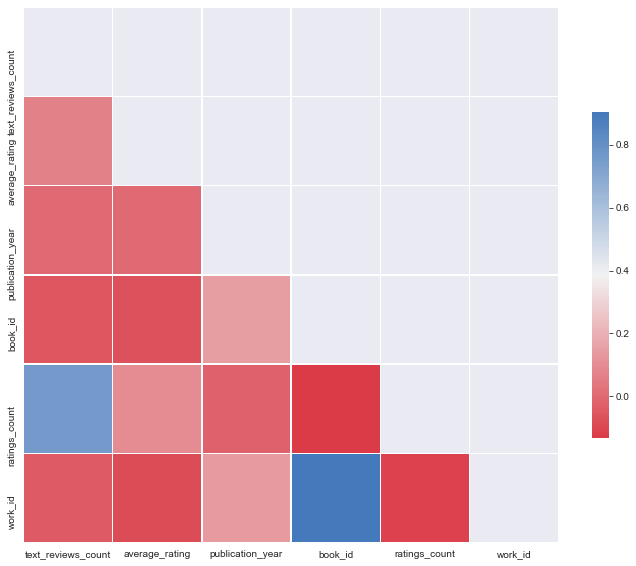

In [13]:
plt.figure(figsize=(5,5))

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'dark')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

sns.heatmap(corr, mask = mask, cmap=cmap, square=True, linewidths=0.5, cbar_kws={"shrink": .5}, ax=ax)

plt.show()

### Displaying the Top 20 rated books of Mystery, Crime and Thriller

In [14]:
most_rated_titles = df[['title', 'ratings_count', 'text_reviews_count','average_rating','publication_year']].sort_values('ratings_count', ascending = False).reset_index()
most_rated_titles = most_rated_titles.drop(['index'], axis=1)
most_rated_titles = most_rated_titles.head(20)
most_rated_titles

,title,ratings_count,text_reviews_count,average_rating,publication_year
0,Watchmen,406669,10057,4.35,2005
1,V for Vendetta,212464,3400,4.25,2005
2,Maus I: A Survivor's Tale: My Father Bleeds Hi...,189288,4402,4.35,1991
3,Batman: Year One,154013,1790,4.22,2005
4,"Death Note, Vol. 1: Boredom (Death Note, #1)",142755,2399,4.42,2005
5,"Saga, Vol. 1 (Saga, #1)",142640,8700,4.24,2012
6,"Scott Pilgrim, Volume 1: Scott Pilgrim's Preci...",131020,2802,4.17,2004
7,Preludes & Nocturnes (The Sandman #1),128419,3084,4.29,1998
8,"Bleach, Volume 01",123807,909,4.21,2004
9,"Hyperbole and a Half: Unfortunate Situations, ...",121909,9098,4.17,2013


### Visualizing the plot between text reviews count and the Average ratings using joint plot

#### From the plot we can observe that as the number of text review count increasing respectively the average ratings also gradually in-creasing from around just above 4.1 ratings to the 4.2 ratings.

C:\Users\upend\anaconda3\lib\site-packages\seaborn\axisgrid.py:1629: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


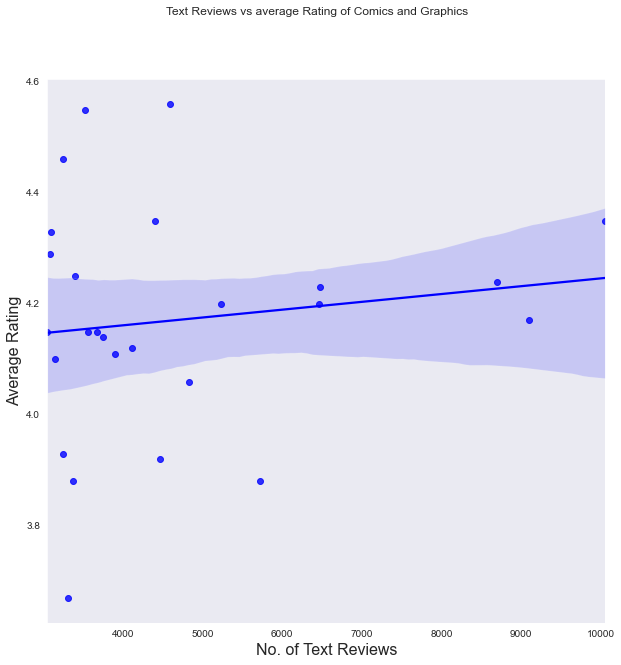

In [15]:
data_TextReviews = df[df['text_reviews_count'] > 3000]

ax = sns.jointplot(x="text_reviews_count", y="average_rating", data = data_TextReviews,height=10,ratio=12000, kind = 'reg', color = 'blue')
ax.fig.suptitle("Text Reviews vs average Rating of Comics and Graphics")
#plt.subtitle(title)
#ax.plt.subplots(figsize=(12, 12))
ax.set_axis_labels("No. of Text Reviews", "Average Rating", fontsize=16)
plt.show()


### Visualising the Top20 rated books of Genre using joint plot

#### From the plot, we can notice that the number of text reviews count onthe X-axis increases respective average ratings on the Y-axisstarted declining slowly from around 4.4 ratings to almostbetween 4.2 and 4.3 ratings

C:\Users\upend\anaconda3\lib\site-packages\seaborn\axisgrid.py:1629: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


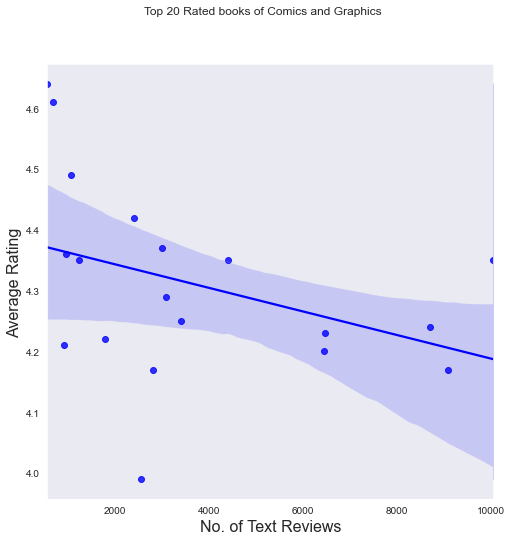

In [21]:
data_TextReviews = df[df['ratings_count'] > 93669]
ax = sns.jointplot(x="text_reviews_count", y="average_rating", data = data_TextReviews,height=8,ratio=1200, kind = 'reg', color = 'blue')
ax.fig.suptitle("Top 20 Rated books of Comics and Graphics")
ax.set_axis_labels("No. of Text Reviews", "Average Rating", fontsize=16)
plt.show()